# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Write-up: Build a Traffic Sign Recognition Classifier

---

## Write-up

1) 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.

This is the write-up and my code can be found in the Jupyter Notebook labeled: Traffic_Sign_Classifier_Final

---

## Dataset Summary & Exploration

1) Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

The code for this step is contained in the second code cell of the Jupyter Notebook.  

I used the numpy library to calculate summary statistics of the traffic signs data set:

* The size of training set is: 34799
* The size of test set is: 4410
* The shape of a traffic sign image is: (32, 32, 3)
* The number of unique classes/labels in the data set is: 43

### Include an exploratory visualization of the dataset

2) Include an exploratory visualization of the dataset and identify where the code is in your code file.

The code for this step is contained in the third and fourth code cells of the Jupyter Notebook.

Here is a histogram showing the distribution of the training samples across the 43 classifications of traffic signs, as well as one example from each class.

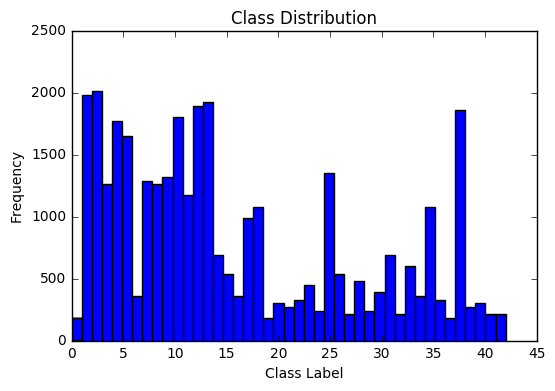

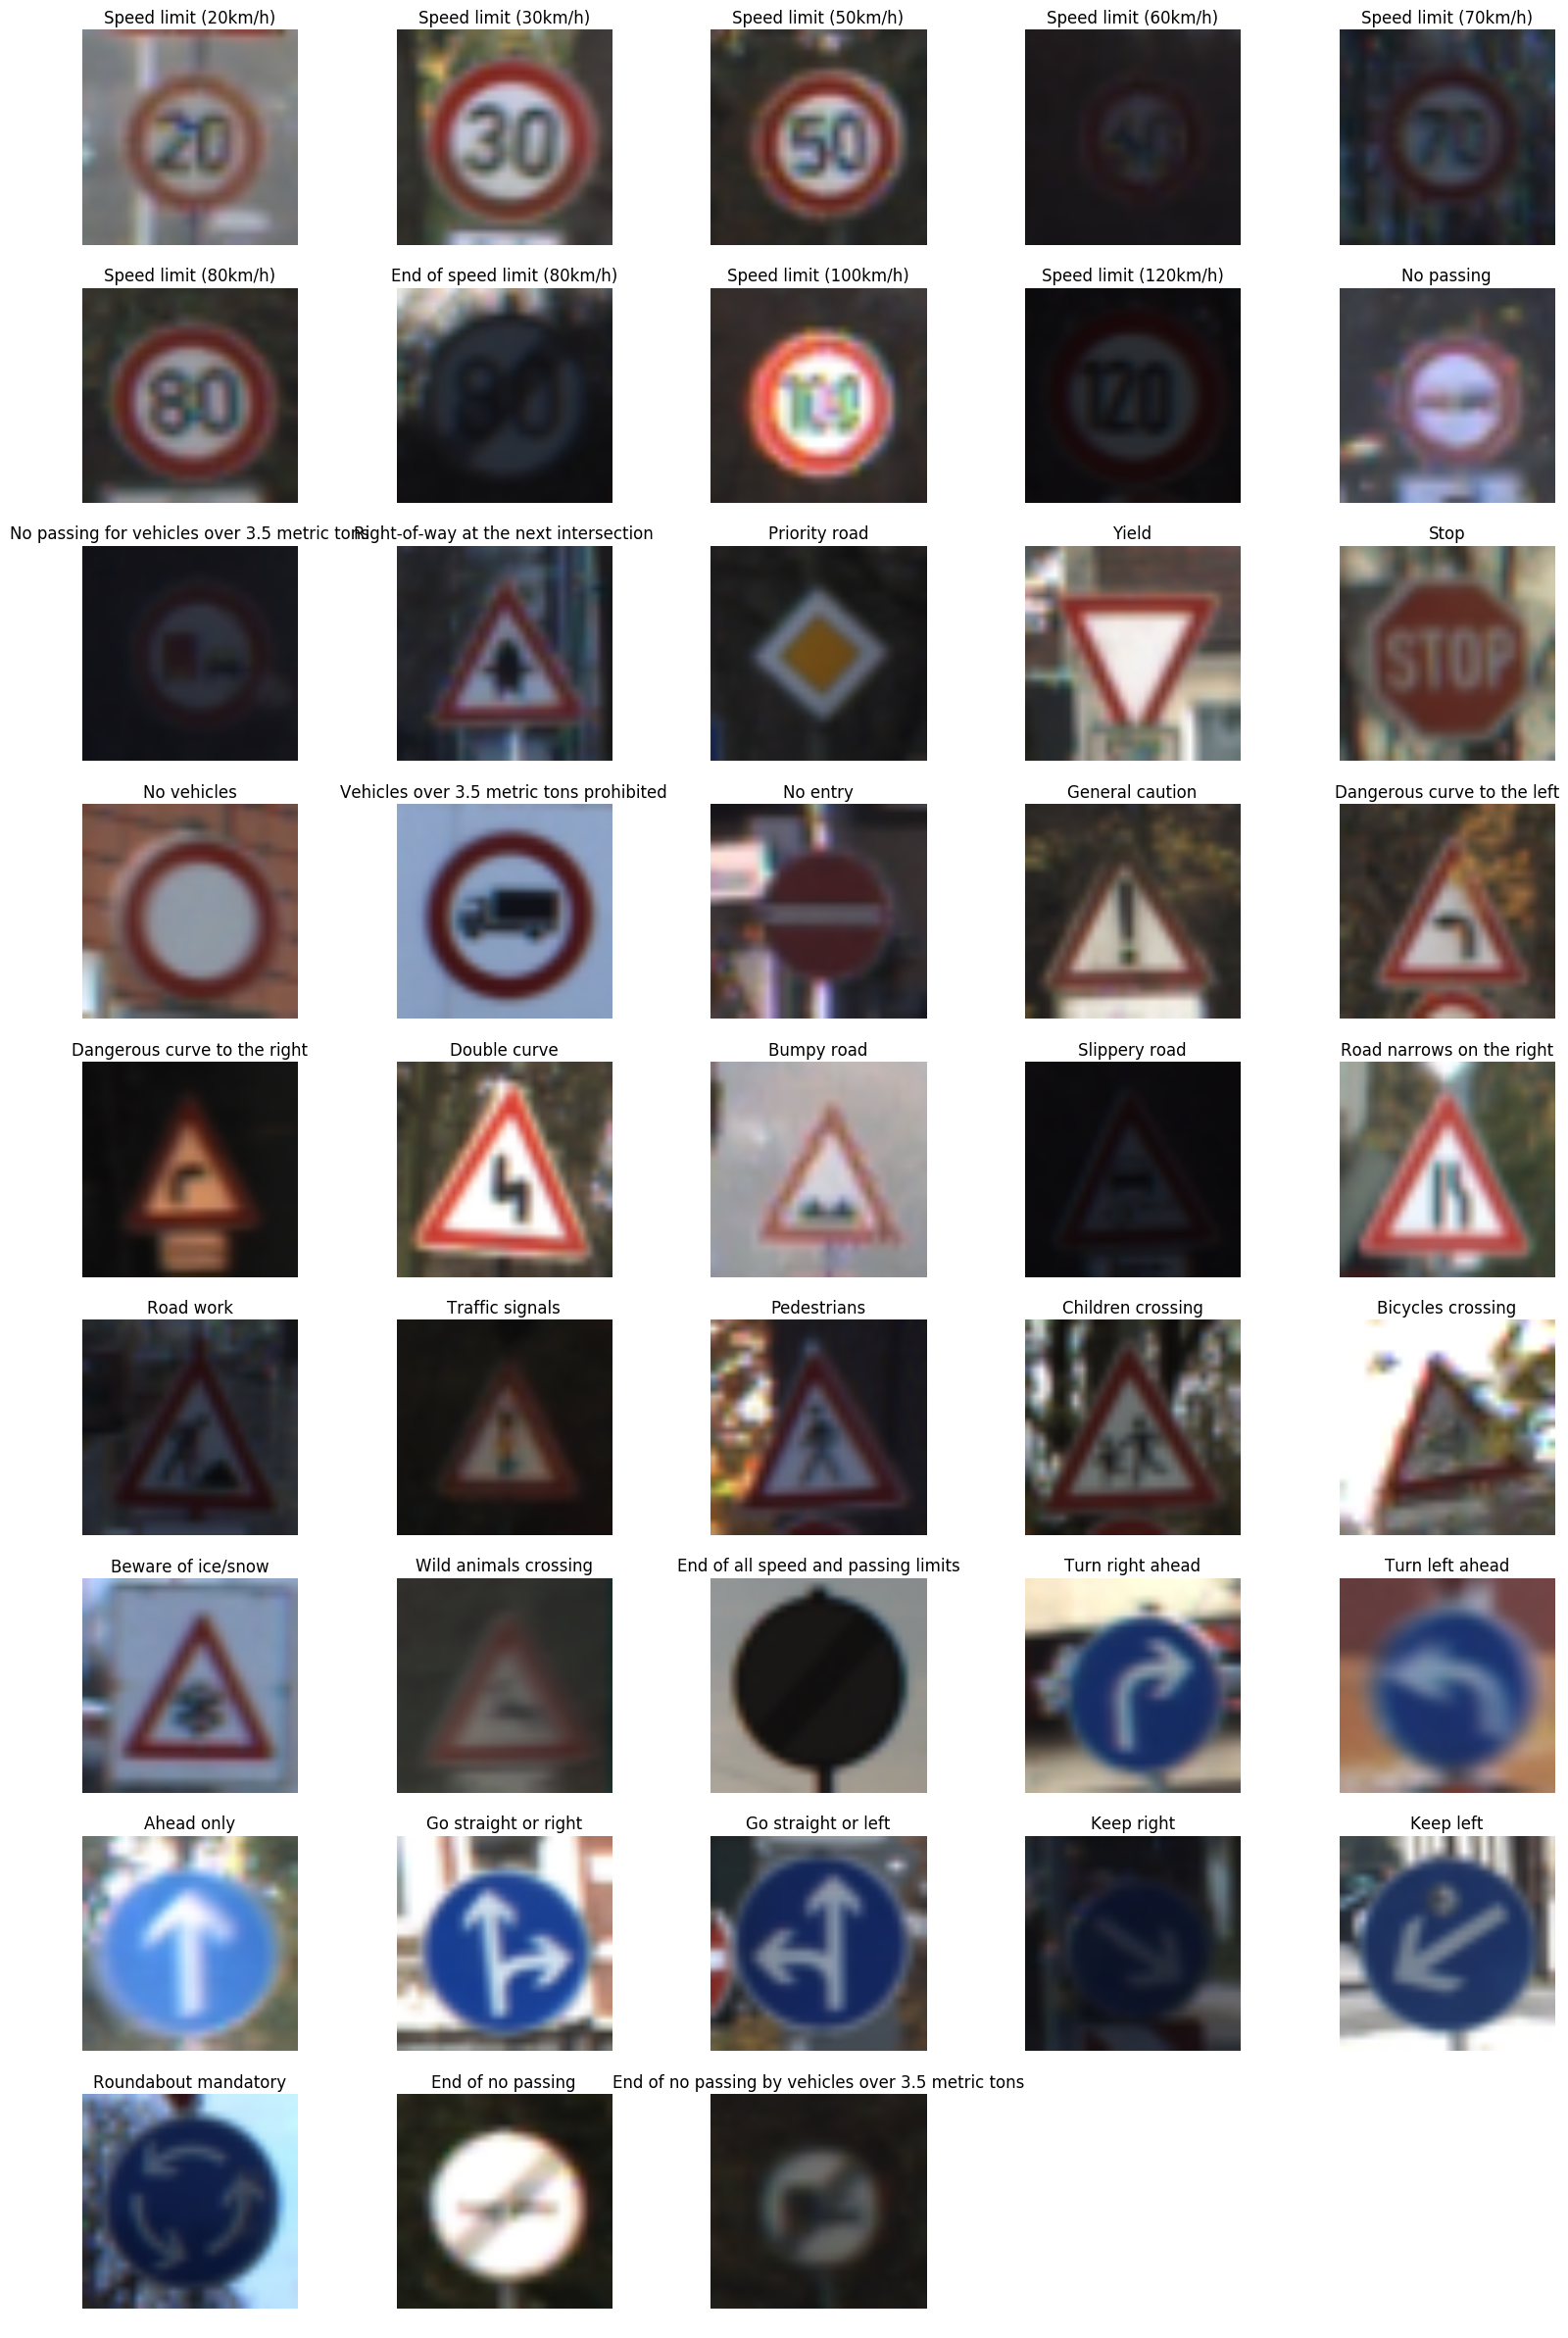

----

## Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

1) Describe how, and identify where in your code, you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

The code for this step is contained in the fifth code cell of the Jupyter Notebook.

At first I simply standardized the data to give it a zero-center and unit variance. This technique alone produced a validation accuracy that topped out in the 93% range after at least a dozen epochs.

Some of the sample images that appear above seemed to be extremely dark and have minimal contrast so I utilized an adaptive histogram equalization method (as opposed to global histogram equalization) that's known as CLAHE in OpenCV, that first divides an image into small blocks called "tiles." Then each of these blocks are histogram equalized as usual. In a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied (the "CL" portion of "CLAHE"). If any histogram bin is above the specified contrast limit, those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied. Color images should be split up into individual RGB channels before applying the CLAHE method. So that's what I did and then I proceeded to merge the channels back together. A before and after image is provided just below the fifth code cell, immediately below.

Adding the CLAHE method to the standardization technique improved the validation accuracy by a few points and it also improved the model's accuracy for my five sample images obtained from the web, bumping up accuracy from 40% to 60%.

2) Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data.

When I started the project, individual training, validation and testing set files were all provided so I didn't need to split the training data.

I did not produce additional data for training but when I have more time I'd like to see if adding rotated images to training would improve validation accuracy.

My final training set had 34799 images. My validation and testings sets contained 4410 and 12630 images, respectively.

Training Set: 34799
Validation Set: 4410
Test Set: 12630


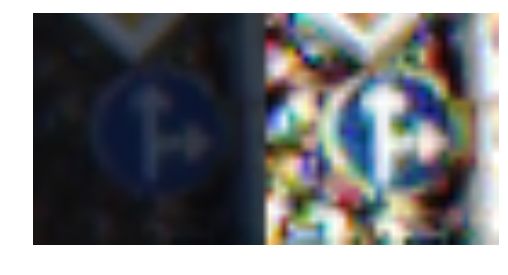

### Model Architecture

3) Describe and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for my final model is located in the sixth code cell of the Jupyter Notebook.

My final model consisted of the following:

- Input: 32x32x3 RGB images
- Layer 1: Convolutional. The output shape should be 28x28x6.
- Activation: RELU function
- Max-Pooling: The output shape should be 14x14x6.
- Layer 2: Convolutional. The output shape should be 10x10x16.
- Activation: RELU function
- Max-Pooling. The output shape should be 5x5x16.
- Flatten: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
- Layer 3: Fully Connected. This should have 120 outputs.
- Activation: RELU function
- Layer 4: Fully Connected. This should have 84 outputs.
- Activation: RELU function
- Layer 5: Fully Connected (Logits). This should have 43 outputs.

### Train, Validate and Test the Model

4) Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The code for training the model can be found in the seventh code cell of the Jupyter Notebook.

To train the model, I used the following:

- Optimizer: Adam
- Epochs: 20
- Batch size: 128
- Learning rate: 0.001


5) Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the training and validation accuracy of the model is located in the seventh code cell of the Jupyter Notebook, while the testing accuracy can be found in the eigth code cell of the Jupyter Notebook.

My final model results were:

- Peak training set accuracy of 99.9% after 15 epochs.
- Peak validation set accuracy of 96.6% after 15 epochs.
- Test set accuracy of 93.6%.
- Sample set accuracy for five images pulled from the web: 60%.


If a well known architecture was chosen:

What architecture was chosen?
- As suggested, I implemented the LeNet-5 architecture for this project.

Why did you believe it would be relevant to the traffic sign application?
- It's a tried and proven convolutional neural network (CNN) designed for handwritten and machine-printed character recognition.

How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
- The results for each of the aforementioned data sets are fairly consistent, with all the figures coming in at 93.6% or higher. Although there's a chance that some slight overfitting is occuring. Utilizing more data or applying the dropout technique might tighten the gap between the training set and testing set accuracies.

---

## Test a Model on New Images

1) Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Below are five German traffic signs that I found on the web:

The 30km/hr image may be difficult to classify because the sign is a rather small part of the image; much of the shot is taken up by background space.

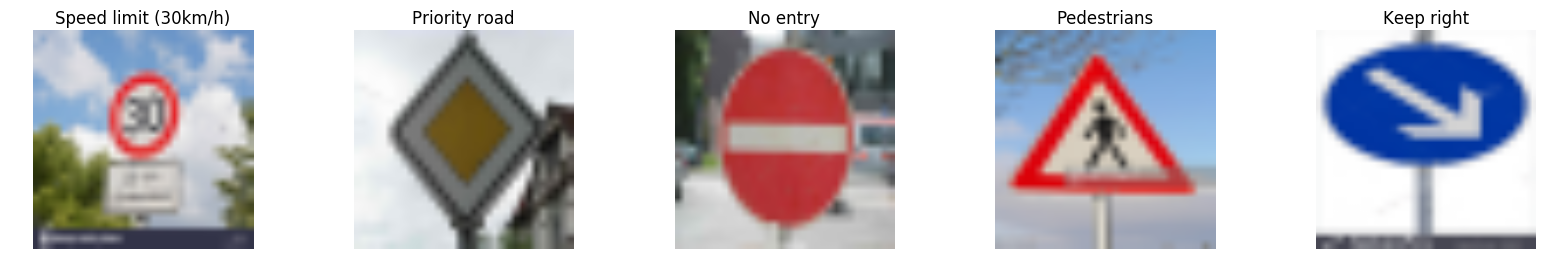

### Predict the Sign Type for Each Image

2) Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

The code for making predictions on my final model is located in the tenth code cell of the Jupyter Notebook.

Here are the results of the prediction:

- Image 1 - Actual Class: 1 / Predicted Class: 1
- Image 2 - Actual Class: 12 / Predicted Class: 12
- Image 3 - Actual Class: 17 / Predicted Class: 17
- Image 4 - Actual Class: 27 / Predicted Class: 1
- Image 5 - Actual Class: 38 / Predicted Class: 26

The model was able to correctly identify three of the five traffic signs I downloaded from the web, resulting in an accuracy of 60%. This compares very poorly to the testing accuracy of 93.6%.

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

3) Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the eleventh cell of the Jupyter Notebook.


For the first image, the model seems unconvinced (probability of 65%) but accurately classifies the image as a "speed limit (30km/h)" sign. The top five softmax probabilities were:

- 1 - Actual Class: 1 / Predicted Class: 1
- 1 - Predicted Class: Probability - (1: 0.6553), (12: 0.3362), (25: 0.0071), (31: 0.0012), (4: 0.0000)


The model correctly classified the second image as a "priority road" sign with a probability of 100%:

- 2 - Actual Class: 12 / Predicted Class: 12
- 2 - Predicted Class: Probability - (12: 1.0000), (9: 0.0000), (42: 0.0000), (40: 0.0000), (10: 0.0000)


The model is accurate again on the third image, predicting a "no entry" sign with nearly 100% certainty:

- 3 - Actual Class: 17 / Predicted Class: 17
- 3 - Predicted Class: Probability - (17: 0.9999), (15: 0.0000), (14: 0.0000), (13: 0.0000), (1: 0.0000)


For the fourth image, the model somehow predicts a "speed limit (30km/h)" sign with a probability of only 76% and shows only one other viable possibility. Unfortunately, neither of these are the correct sign in the image: "pedestrians" sign. The top five softmax probabilities were:

- 4 - Actual Class: 27 / Predicted Class: 1
- 4 - Predicted Class: Probability - (1: 0.7577), (18: 0.2423), (0: 0.0000), (24: 0.0000), (39: 0.0000)


For the fifth and final image, the model seems unsure, and predicts that this is a "traffic signals" sign, with 69% certainty but it's actually a "keep right" sign. The top five softmax probabilities were:

- 5 - Actual Class: 38 / Predicted Class: 26
- 5 - Predicted Class: Probability - (26: 0.6941), (10: 0.1197), (13: 0.0613), (12: 0.0586), (11: 0.0563)